First, we have to import all the libraries we will be using. In this tutorial we will be using Keras, Matplotlib, NumPy, time, requests, sys, json, and OpenCV 4.1 (cv2). For more info on how to download these libraries, refer to the documentation posted by the creators of the libraries.

In [1]:
import requests
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import load_model
import time
import cv2
import sys
import json

Using TensorFlow backend.


In this cell we load the **MNIST Dataset**. This dataset contains thousands of pictures of handwritten digits for us to train and test our neural network on. X variables contain the images we will train on while the y variables contain the corresponding labels for the images.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Next, we have to create a random seed for NumPy's random number generator. We can do this by using the current time using the time.time() function and casting the result to an integer. 

We can make sure that our data loaded correctly by printing out an example from our training set using Matplotlib's imshow() function.

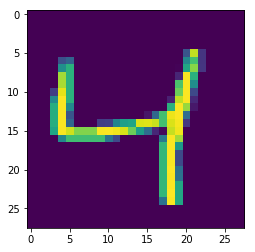

In [3]:
seed = int(time.time())
np.random.seed(seed)
plt.imshow(X_train[2])

Before we use the data to train our neural network, we have to "clean up" the data to make it easier for our neural network to make accurate predictions after it is trained. We can do this by inverting the color of the images and makeing them only black and white (color values of 255 or 0). The final data transformation is done using the `reshape()` function. This function turns the data into a 7

(10000, 784)


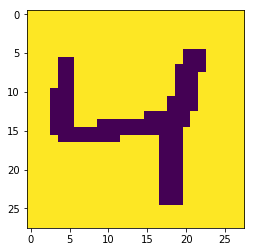

In [4]:

for i in range(0,len(X_train)):
    X_train[i] = cv2.bitwise_not(X_train[i])
    X_train[i][X_train[i]<255] = 0

for i in range(0, len(X_test)):
    X_test[i]= cv2.bitwise_not(X_test[i])
    X_test[i][X_test[i]<255] = 0


plt.imshow(X_train[2])


num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(X_test.shape)

We can normalize our data by dividing each data point by 255. Because the data is currently grayscale, the color values can range between 0-255. Normalizing the data gives us a smaller range of variability in our inputs/outputs.

In [5]:
X_train = X_train / 255
X_test = X_test / 255

Since computers don't automatically know the difference between number labels such as "One" or "Seven", we can use a **one hot encoding** of the values for each class by calling the `np_utils.to_categorical()` function. To learn more about how **one hot encoding** works, click [here](https://medium.com/@oraheem/one-hot-encoding-in-machine-learning-b2d344284d9e)

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Next, we have to create the model itself. Our model will be a simple neural network with a single hidden layer that has 784 neurons. This layer will use [RELU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) as its activation function. The activation function that we will use on our output layer will be a [softmax](https://en.wikipedia.org/wiki/Softmax_function). This allows our outputs to be proababilities corresponding to which number the neural network is predicting.

In [7]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

**This cell should only be run if you have already saved a model. This allows the user to not re-train a model that has already been trained.**

In [ ]:
model = load_model('model.h5')

This is the cell where we fit the model to the data. The model is trained on the data for 10 epochs, and it is tested against the `X_test` dataset. Through this process, we can measure the accuracy of our model by its error. This cell may take a few minutes to run.

In [8]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

W0725 16:28:57.509578 4561819072 deprecation_wrapper.py:119] From /Users/abajo01/.pyenv/versions/3.5.3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 16:28:57.556096 4561819072 deprecation_wrapper.py:119] From /Users/abajo01/.pyenv/versions/3.5.3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 16:28:57.572103 4561819072 deprecation_wrapper.py:119] From /Users/abajo01/.pyenv/versions/3.5.3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0725 16:28:57.618942 4561819072 deprecation_wrapper.py:119] From /Users/abajo01/.pyenv/versions/3.5.3/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.4933 - acc: 0.8526 - val_loss: 0.2966 - val_acc: 0.9144
Epoch 2/10
 - 5s - loss: 0.2637 - acc: 0.9207 - val_loss: 0.2057 - val_acc: 0.9380
Epoch 3/10
 - 5s - loss: 0.2005 - acc: 0.9402 - val_loss: 0.1707 - val_acc: 0.9519
Epoch 4/10
 - 4s - loss: 0.1564 - acc: 0.9525 - val_loss: 0.1447 - val_acc: 0.9586
Epoch 5/10
 - 4s - loss: 0.1313 - acc: 0.9608 - val_loss: 0.1226 - val_acc: 0.9626
Epoch 6/10
 - 4s - loss: 0.1163 - acc: 0.9644 - val_loss: 0.1300 - val_acc: 0.9617
Epoch 7/10
 - 4s - loss: 0.1020 - acc: 0.9691 - val_loss: 0.1136 - val_acc: 0.9674
Epoch 8/10
 - 4s - loss: 0.0928 - acc: 0.9715 - val_loss: 0.1103 - val_acc: 0.9666
Epoch 9/10
 - 4s - loss: 0.0844 - acc: 0.9738 - val_loss: 0.1061 - val_acc: 0.9676
Epoch 10/10
 - 5s - loss: 0.0764 - acc: 0.9761 - val_loss: 0.1034 - val_acc: 0.9675
Baseline Error: 3.25%


After training our model, we can save it to a .h5 file so we can load it later. 

In [9]:
model.save('model.h5')

This next cell sets up the payloads to send to the Node.js server that will be running on the Raspberry Pi. Since the Raspberry Pi is not powerful enough to train a neural network, we train and use the model on the PC/Mac, then send commands over to the pi based on the model's predictions.

The `pi_ip` variable should be replaced with the IP address of your Raspberry Pi.

**NOTE: You must have the Node.js server running on the Raspberry Pi before the next cell is run.**

In [ ]:
pi_ip = ''
lights_url = 'http://{}:2010/api/v1.0/io/setAllLedsWith32BitMask/1'.format(pi_ip)
motors_url = 'http://{}:2010/api/v1.0/drive/rawMotors/2'.format(pi_ip)
drive_url = 'http://{}:2010/api/v1.0/drive/driveWithHeading/2'.format(pi_ip)
wake_url = 'http://{}:2010/api/v1.0/power/wake/1'.format(pi_ip)

headers = {
    'Content-Type': 'application/json',
    'accept': 'application/json'
}


payload0 = {
        "leftMode" : 1,
        "rightMode" : 2,
        "leftSpeed" : 255,
        "rightSpeed" : 255
}

payload1 = {
        "flags": 0,
        "speed": 128,
        "heading": 0
}

payload2 = {
        "flags": 0,
        "speed": 128,
        "heading": 90
}

payload3 = {
        "flags": 0,
        "speed": 128,
        "heading": 180
}

payload4 = {
        "flags": 0,
        "speed": 128,
        "heading": 270
}

payload5 = {
        "ledBrightnessValues": [255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0,
                                255, 0, 0],
        "ledGroup": 1073741823
}



payload6 = {
        "ledBrightnessValues": [0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0,
                                0, 255, 0],
        "ledGroup": 1073741823
}

payload7 = {
        "ledBrightnessValues": [0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255,
                                0, 0, 255],
        "ledGroup": 1073741823
}



payload8 = {
        "ledBrightnessValues": [255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0,
                                255, 255, 0],
        "ledGroup": 1073741823
}

payload9 = {
        "ledBrightnessValues": [255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255,
                                255, 255, 255],
        "ledGroup": 1073741823
}

In this final cell, we start a camera feed. Because we only want the most important details from the camera feed, there are multiple filters applied to the image. We also resize it in the same way that we resized the training data.
When on the pop-up window, if the 'q' key is pressed, the neural network will output its prediciton of what is currently on the camera and send the corresponding command to RVR. If the 'e' key is pressed, the feed will stop and the program with end until you re-run this cell.

In [ ]:
requests.put(wake_url)

video_capture = cv2.VideoCapture(0)
video_capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
video_capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)

ret, frame = video_capture.read()
print(frame.shape)
ret,frame = video_capture.read()
# Capture frame-by-frame
while True:
    ret, frame = video_capture.read()
    width = int(frame.shape[1] * 4.375 / 100)
    height = int(frame.shape[0] * 6 / 100)
    dim = (width, height)
    
    frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.GaussianBlur(frame,(3,3),0)
    frame[frame<=100] = 0
    frame[frame>100] = 255
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    frame = cv2.morphologyEx(frame, cv2.MORPH_CLOSE, kernel)

    pixels = frame.shape[0] * frame.shape[1]
    reshaped = frame.reshape(pixels).astype('float32')
    reshaped = reshaped /255
    
    cv2.imshow('Video', frame)
    value = model.predict( np.array([reshaped,]))    
    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        if np.amax(value) >= .5:
            decision = np.where(value == np.amax(value))[1][0]
            print(decision)
            print(frame.shape)
            if decision == 1:
                response = requests.put(drive_url, headers=headers,data=json.dumps(payload1))
            elif decision == 2:
                response = requests.put(drive_url, headers=headers,data=json.dumps(payload2))
            elif decision == 3:
                response = requests.put(drive_url, headers=headers,data=json.dumps(payload3))
            elif decision == 4:
                response = requests.put(drive_url, headers=headers,data=json.dumps(payload4))
            elif decision == 5:
                response = requests.put(lights_url, headers=headers,data=json.dumps(payload5))
            elif decision == 6:
                response = requests.put(lights_url, headers=headers,data=json.dumps(payload6))
            elif decision == 7:
                response = requests.put(lights_url, headers=headers,data=json.dumps(payload7))
            elif decision == 8:
                response = requests.put(lights_url, headers=headers,data=json.dumps(payload8))
            elif decision == 9:
                response = requests.put(lights_url, headers=headers,data=json.dumps(payload9))
            elif decision == 0:
                response = requests.put(motors_url, headers=headers,data=json.dumps(payload0))
            
            plt.imshow(frame)
        else:
            print('no number found!!')
            #print(value)
    if cv2.waitKey(1) & 0xFF == ord('e'):
        break

video_capture.release()
cv2.destroyAllWindows()